* [Github Ultralytics](https://github.com/ultralytics/ultralytics/tree/main)
* [COCO classes](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml)
* [Documentation](https://docs.ultralytics.com/)

In [1]:
!pip install ultralytics

In [ ]:
!wget https://ultralytics.com/images/bus.jpg

In [2]:
from ultralytics import YOLO


0: 384x640 1 person, 465.6ms
Speed: 9.2ms preprocess, 465.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


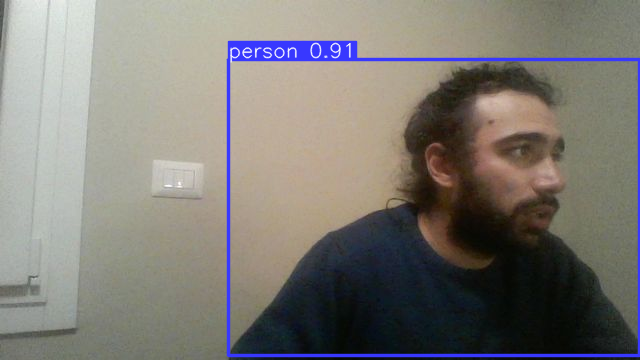

In [8]:
from PIL import Image
import imutils
import cv2
import torch

class MyModel:
    def __init__(self):
        #device = torch.device("cuda:0")
        device = torch.device("cpu")
        self.net = YOLO("yolov8n.pt")
        #self.net = YOLO("yolov8x-cls.pt")
        #self.net = YOLO("yolov8n-seg.pt")
        #self.net = YOLO("yolov8n-oiv7.pt")
        #self.net = YOLO("yolov8x-obb.pt")
        #self.net = YOLO("yolov8x-pose.pt")
        self.net = self.net.to(device)
    def run(self, image):
        results = self.net(image)
        return results

net = MyModel()
im = cv2.imread("bus.jpg", 1) # BGR # 1=cv2.IMREAD_COLOR, 0=cv2.IMREAD_GRAY
#im = cv2.imread("photo.jpg", 1) # BGR # 1=cv2.IMREAD_COLOR, 0=cv2.IMREAD_GRAY
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
res = net.run(im)

img_res = res[0].plot()
display(Image.fromarray(img_res))

## Utilizzo con la webcam

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


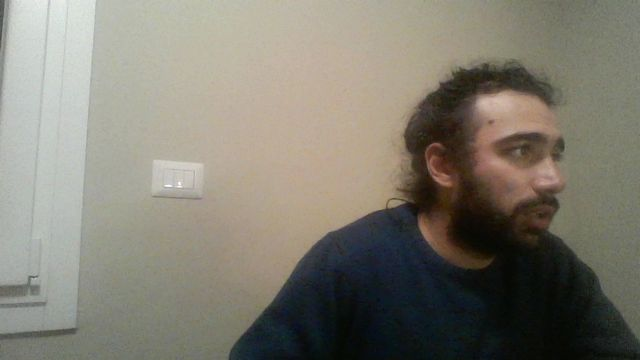

In [7]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))